In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import datetime


In [4]:
sensor1 = pd.read_excel('TSPD04ESY01801451_20230322_140502.xlsx')
sensor2 = pd.read_excel('TSPD04ESY01802042_20230322_140502.xlsx')
sensor3 = pd.read_excel('TSPD04ESY01802105_20230322_140502.xlsx')

In [230]:
datetime1 = [datetime.datetime.fromtimestamp(x) for x in sensor1['tsmTs.2']]
datetime2 = [datetime.datetime.fromtimestamp(x) for x in sensor2['tsmTs.2']]
datetime3 = [datetime.datetime.fromtimestamp(x) for x in sensor3['tsmTs.2']]


datetime1_histo = [datetime.datetime.fromtimestamp(x) for x in sensor1['tsmTs.3'][:34000]]



In [234]:
sensor1

,batl,deploymentGroupId,tsmEv,tsmGw,tsmId,tsmTs,tsmTuid,Unnamed: 7,accx,accy,...,histogram2,histogram3,histogram4,histogram5,histogram6,tsmEv.3,tsmGw.3,tsmId.3,tsmTs.3,tsmTuid.3
0,94.0,prno00kirkenes0oxygendevices,10.0,TSGW01ETR02900417,1110.0,1.678160e+09,TSPD04ESY01801451,NaN,6.0,61.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900417,16100.0,1.677433e+09,TSPD04ESY01801451
1,94.0,prno00kirkenes0oxygendevices,10.0,TSGW01ETR02900417,1110.0,1.678181e+09,TSPD04ESY01801451,NaN,6.0,61.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900417,16100.0,1.677433e+09,TSPD04ESY01801451
2,94.0,prno00kirkenes0oxygendevices,10.0,TSGW01ETR02900417,1110.0,1.678203e+09,TSPD04ESY01801451,NaN,6.0,61.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900417,16100.0,1.677433e+09,TSPD04ESY01801451
3,94.0,prno00kirkenes0oxygendevices,10.0,TSGW01ETR02900417,1110.0,1.678224e+09,TSPD04ESY01801451,NaN,6.0,61.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900417,16100.0,1.677433e+09,TSPD04ESY01801451
4,94.0,prno00kirkenes0oxygendevices,10.0,TSGW01ETR02900417,1110.0,1.678246e+09,TSPD04ESY01801451,NaN,6.0,61.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900417,16100.0,1.677433e+09,TSPD04ESY01801451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
sensor1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72090 entries, 0 to 72089
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   batl                 62 non-null     float64
 1   deploymentGroupId    62 non-null     object 
 2   tsmEv                62 non-null     float64
 3   tsmGw                62 non-null     object 
 4   tsmId                62 non-null     float64
 5   tsmTs                62 non-null     float64
 6   tsmTuid              62 non-null     object 
 7   Unnamed: 7           0 non-null      float64
 8   accx                 41000 non-null  float64
 9   accy                 41000 non-null  float64
 10  accz                 41000 non-null  float64
 11  deploymentGroupId.1  41000 non-null  object 
 12  tsmEv.1              41000 non-null  float64
 13  tsmGw.1              41000 non-null  object 
 14  tsmId.1              41000 non-null  float64
 15  tsmTs.1              41000 non-null 

In [8]:
print(sensor1['temp'].isna().sum())
print(sensor2['temp'].isna().sum())
print(sensor3['temp'].isna().sum())

0
0
0


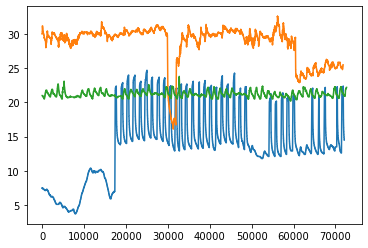

In [9]:
plt.plot(sensor1.temp, label='Temperature 1') 
plt.plot(sensor2.temp, label='Temperature 2') 
plt.plot(sensor3.temp, label='Temperature 3') 

count    72636.000000
mean        13.536910
std          4.177664
min          5.900000
25%          9.600000
50%         13.600000
75%         17.200000
max         21.600000
Name: humd, dtype: float64


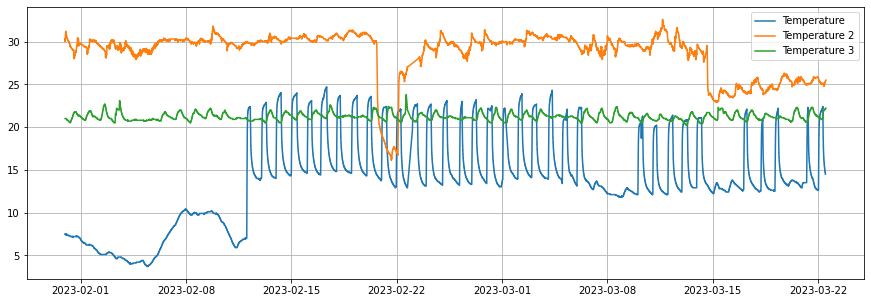

In [241]:
plt.figure(figsize=(15,5))
plt.plot(datetime1, sensor1.temp, label='Temperature')
# plt.plot(sensor1.humd, label='Humidity')   
# plt.plot(sensor1.lght, label='Light')    


   

# plt.plot(sensor1.accx, label='accx')  
# plt.plot(sensor1.accy, label='accy')  
# plt.plot(sensor1.accz, label='accz')  
# plt.plot(sensor1.energyLevel, label='Energy Level') 
# plt.plot(sensor1.airp, label='Air Pressure') 

# plt.plot(sensor2.accx, label='accx')  
# plt.plot(sensor2.accy, label='accy') 
# plt.plot(sensor2.accz, label='accz')  


plt.plot(datetime2, sensor2.temp, label='Temperature 2')
# plt.plot(sensor2.humd, label='Humidity 2')   
# plt.plot(sensor2.lght, label='Light 2') 


plt.plot(datetime3, sensor3.temp, label='Temperature 3')
# plt.plot(sensor3.humd, label='Humidity 3')   
# plt.plot(sensor3.lght, label='Light 2') 


# plt.plot(sensor1.airp, label='1') 
# plt.plot(sensor2.airp, label='2') 
# plt.plot(sensor3.airp, label='3') 
print(sensor3.humd.describe())


plt.grid(True)
plt.legend() 
plt.show()


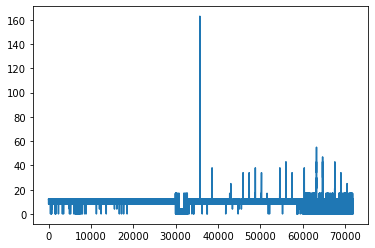

In [11]:
# plt.plot(sensor1.lght, label='Light 2') 
plt.plot(sensor2.lght, label='Light 2') 
# plt.plot(sensor3.lght, label='Light 2') 


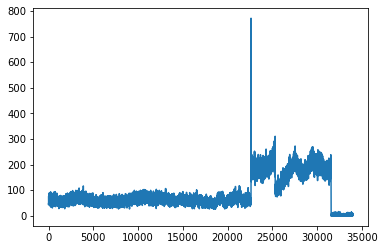

In [12]:
 plt.plot(sensor2.energyLevel, label='Light 2') 
 

In [13]:
sensor1['tsmTs'].isna().sum()

72028

In [14]:
sensor1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72090 entries, 0 to 72089
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   batl                 62 non-null     float64
 1   deploymentGroupId    62 non-null     object 
 2   tsmEv                62 non-null     float64
 3   tsmGw                62 non-null     object 
 4   tsmId                62 non-null     float64
 5   tsmTs                62 non-null     float64
 6   tsmTuid              62 non-null     object 
 7   Unnamed: 7           0 non-null      float64
 8   accx                 41000 non-null  float64
 9   accy                 41000 non-null  float64
 10  accz                 41000 non-null  float64
 11  deploymentGroupId.1  41000 non-null  object 
 12  tsmEv.1              41000 non-null  float64
 13  tsmGw.1              41000 non-null  object 
 14  tsmId.1              41000 non-null  float64
 15  tsmTs.1              41000 non-null 

In [15]:
sensor3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72636 entries, 0 to 72635
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   batl                 249 non-null    float64
 1   deploymentGroupId    249 non-null    object 
 2   tsmEv                249 non-null    float64
 3   tsmGw                249 non-null    object 
 4   tsmId                249 non-null    float64
 5   tsmTs                249 non-null    float64
 6   tsmTuid              249 non-null    object 
 7   Unnamed: 7           0 non-null      float64
 8   accx                 41000 non-null  float64
 9   accy                 41000 non-null  float64
 10  accz                 41000 non-null  float64
 11  deploymentGroupId.1  41000 non-null  object 
 12  tsmEv.1              41000 non-null  float64
 13  tsmGw.1              41000 non-null  object 
 14  tsmId.1              41000 non-null  float64
 15  tsmTs.1              41000 non-null 

In [16]:
sensor2.temp.describe()


count    71817.000000
mean        28.693052
std          2.730138
min         16.100000
25%         28.600000
50%         29.800000
75%         30.300000
max         32.600000
Name: temp, dtype: float64

(72636,)


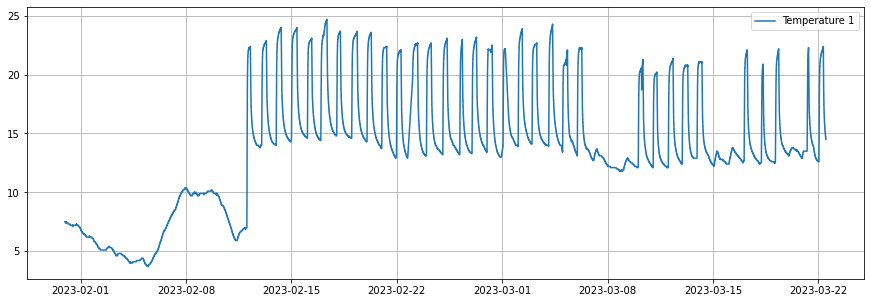

In [219]:
plt.figure(figsize=(15,5))


 
plt.plot(datetime1, sensor1.temp, label='Temperature 1') 
# plt.plot(datetime2, sensor2.temp, label='Temperature 2') 
# plt.plot(datetime3, sensor3.temp, label='Temperature 3') 
# plt.plot(datetime1_histo, sensor1.histogram0, label='activityLevel 1') 
# plt.plot(datetime2, sensor2.activityLevel, label='activityLevel 2') 
# plt.plot(datetime3, sensor3.activityLevel, label='activityLevel 3') 
# plt.plot(datetime3, (sensor1.temp + sensor2.temp + sensor3.temp) /3 , label='average') 
# plt.plot(datetime3, sensor3.temp, label='Temp 3') 
# plt.plot(datetime1, sensor1.humd, label='Humidit') 
# plt.plot(datetime2, sensor2.humd, label='Hum 2') 
# plt.plot(datetime3, sensor3.humd, label='Hum 3') 

print(sensor3.histogram0.shape)

plt.grid(True)
plt.legend() 
plt.show()

count     71817.000000
mean      99650.752224
std        1114.446679
min       97690.500000
25%       98810.100000
50%       99523.600000
75%      100527.000000
max      102174.000000
Name: airp, dtype: float64
count    71817.000000
mean         9.452261
std          3.763743
min          0.000000
25%          8.000000
50%          8.000000
75%         12.000000
max        163.000000
Name: lght, dtype: float64


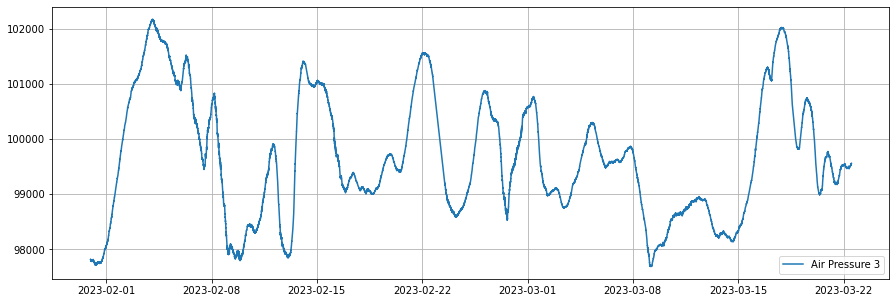

In [18]:
plt.figure(figsize=(15,5))

# plt.plot(datetime2, sensor2.temp, label='Temperature 3') 
# plt.plot(datetime2, sensor2.humd, label='Humidity 3') 
plt.plot(datetime2, sensor2.airp, label='Air Pressure 3') 
# plt.plot(datetime2, sensor2.lght, label='Light 3')

print(sensor2.airp.describe())
print(sensor2.lght.describe())

plt.grid(True)
plt.legend() 
plt.show()

In [19]:
# plt.figure(figsize=(15,5))

# d = [datetime.datetime.fromtimestamp(x) for x in sensor1['tsmTs']]

# plt.plot(d, sensor2.accx, label='Hum 3') 
# plt.plot(d, sensor2.accy, label='Hum 3') 



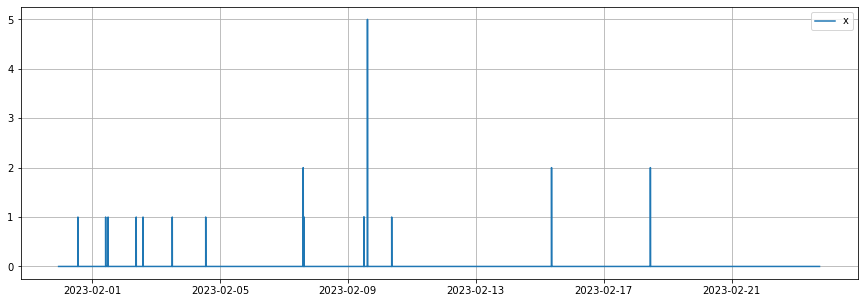

In [244]:
plt.figure(figsize=(15,5))

# plt.plot(datetime1, sensor1.energyLevel, label='Hum 3') 
plt.plot(datetime3, sensor3.histogram0, label='x') 
# plt.plot(datetime3, sensor3.accy, label='y') 

plt.grid(True)
plt.legend() 
plt.show()

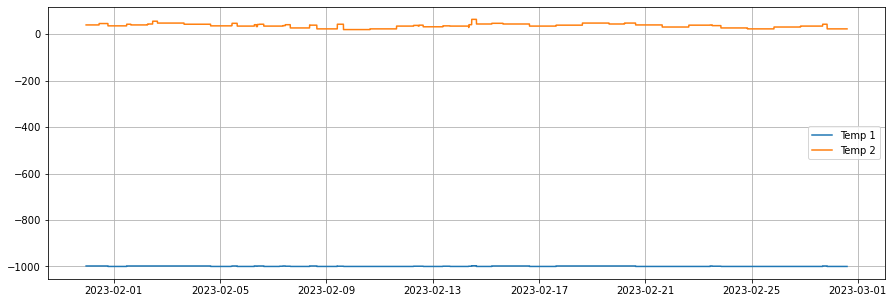

In [21]:


plt.figure(figsize=(15,5))

plt.plot(datetime3, sensor3.accx, label='Temp 1') 
plt.plot(datetime3, sensor3.accy, label='Temp 2') 
 
plt.grid(True)
plt.legend() 
plt.show()

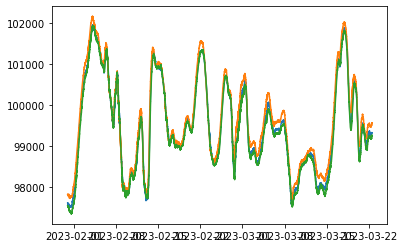

In [22]:
plt.plot(datetime1, sensor1.airp, label='Temp 1') 
plt.plot(datetime2, sensor2.airp, label='Temp 1') 
plt.plot(datetime3, sensor3.airp, label='Temp 1') 


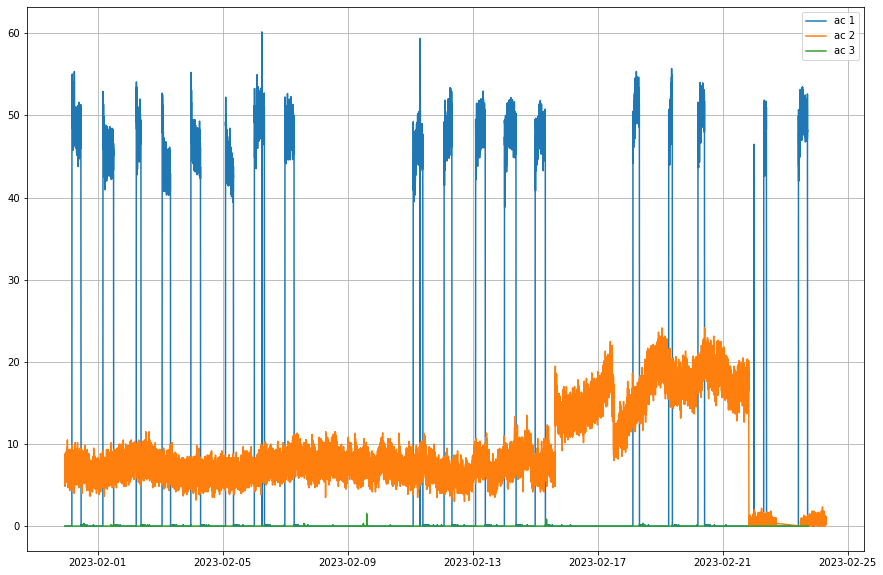

In [23]:
plt.figure(figsize=(15, 10))

plt.plot(datetime1, sensor1.activityLevel, label='ac 1') 
plt.plot(datetime2, sensor2.activityLevel, label='ac 2') 
plt.plot(datetime3, sensor3.activityLevel, label='ac 3') 


plt.grid(True)
plt.legend() 
plt.show()


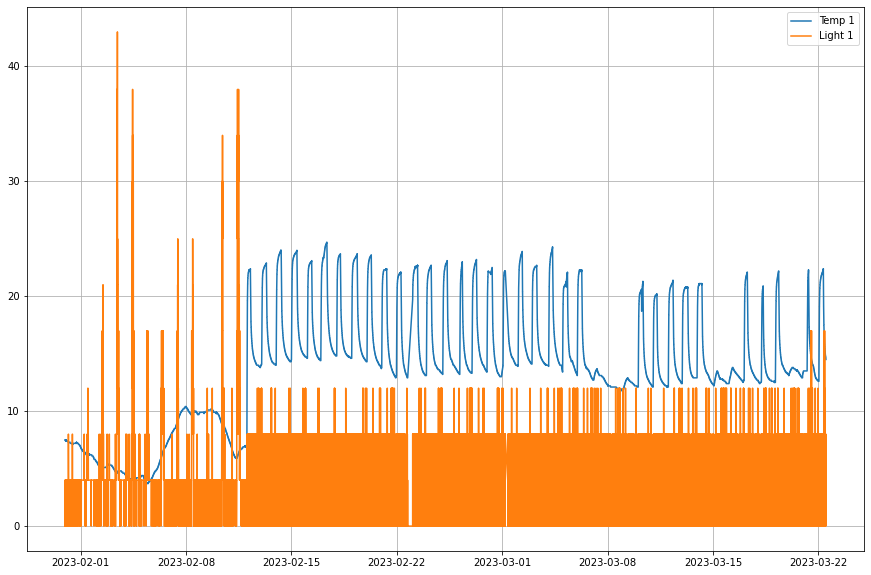

In [24]:
plt.figure(figsize=(15, 10))

plt.plot(datetime1, sensor1.temp, label='Temp 1') 
plt.plot(datetime1, sensor1.lght, label='Light 1') 


plt.grid(True)
plt.legend() 
plt.show()

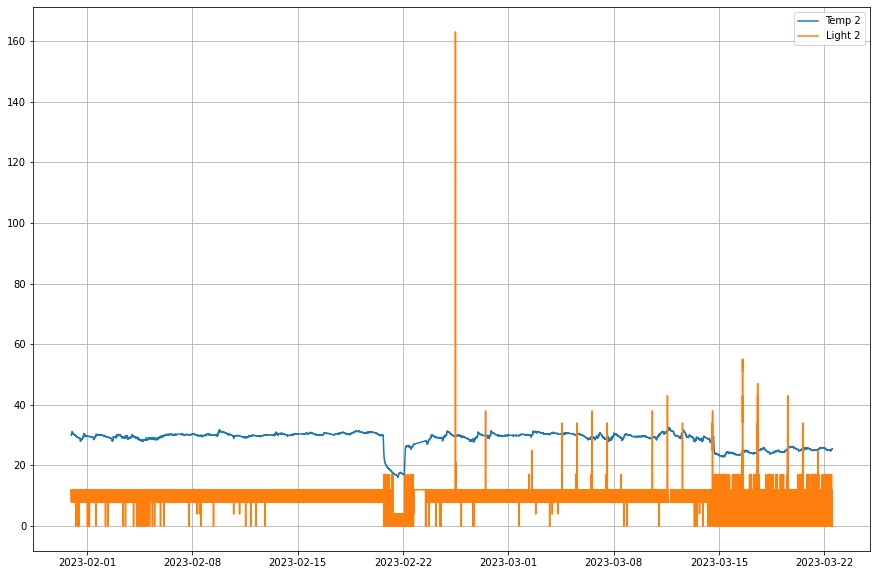

In [25]:
plt.figure(figsize=(15, 10))

# plt.plot(datetime1, sensor1.temp, label='Temp 1') 
plt.plot(datetime2, sensor2.temp, label='Temp 2') 
# plt.plot(datetime1, sensor1.lght, label='Light 1') 
plt.plot(datetime2, sensor2.lght, label='Light 2') 


plt.grid(True)
plt.legend() 
plt.show()


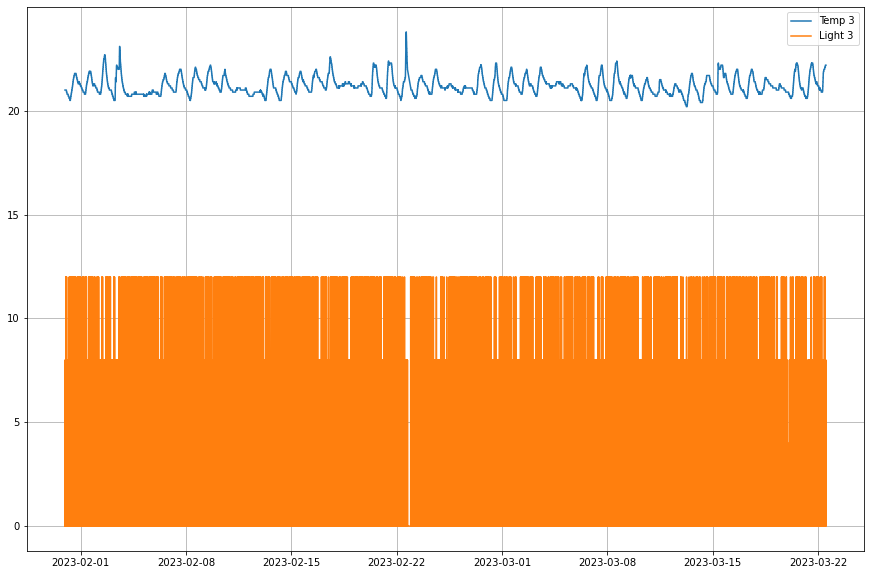

In [26]:
plt.figure(figsize=(15, 10))

plt.plot(datetime3, sensor3.temp, label='Temp 3') 
plt.plot(datetime3, sensor3.lght, label='Light 3') 


plt.grid(True)
plt.legend() 
plt.show()

In [27]:
sensor1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72090 entries, 0 to 72089
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   batl                 62 non-null     float64
 1   deploymentGroupId    62 non-null     object 
 2   tsmEv                62 non-null     float64
 3   tsmGw                62 non-null     object 
 4   tsmId                62 non-null     float64
 5   tsmTs                62 non-null     float64
 6   tsmTuid              62 non-null     object 
 7   Unnamed: 7           0 non-null      float64
 8   accx                 41000 non-null  float64
 9   accy                 41000 non-null  float64
 10  accz                 41000 non-null  float64
 11  deploymentGroupId.1  41000 non-null  object 
 12  tsmEv.1              41000 non-null  float64
 13  tsmGw.1              41000 non-null  object 
 14  tsmId.1              41000 non-null  float64
 15  tsmTs.1              41000 non-null 

In [28]:
copy1 = sensor1.copy()
copy1 = copy1.drop(columns=[
    'deploymentGroupId', 'tsmEv', 'tsmGw', 'tsmId', 'tsmTs', 'tsmTuid', 'Unnamed: 7',
    'deploymentGroupId.1', 'tsmEv.1', 'tsmGw.1', 'tsmId.1', 'tsmTs.1', 'tsmTuid.1', 'Unnamed: 17',
    'deploymentGroupId.2', 'tsmEv.2', 'tsmGw.2', 'tsmId.2', 'tsmTuid.2', 'Unnamed: 28',
    'deploymentGroupId.3', 'tsmEv.3', 'tsmGw.3', 'tsmId.3', 'tsmTuid.3'
])

<AxesSubplot:>

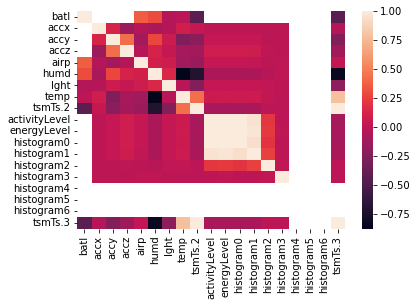

In [29]:
import seaborn as sns


copy1.corr()

corr = copy1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

<AxesSubplot:>

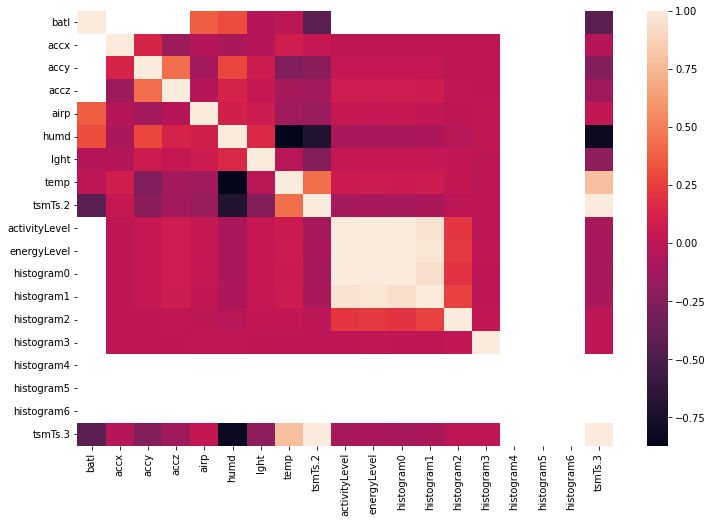

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [31]:
x_data_datetime = [datetime.datetime.fromtimestamp(x) for x in sensor1['tsmTs.2']]
x_data_datetime

[datetime.datetime(2023, 1, 30, 23, 0, 16),
 datetime.datetime(2023, 1, 30, 23, 1, 16),
 datetime.datetime(2023, 1, 30, 23, 2, 15),
 datetime.datetime(2023, 1, 30, 23, 3, 15),
 datetime.datetime(2023, 1, 30, 23, 4, 15),
 datetime.datetime(2023, 1, 30, 23, 5, 15),
 datetime.datetime(2023, 1, 30, 23, 6, 15),
 datetime.datetime(2023, 1, 30, 23, 7, 15),
 datetime.datetime(2023, 1, 30, 23, 8, 15),
 datetime.datetime(2023, 1, 30, 23, 9, 15),
 datetime.datetime(2023, 1, 30, 23, 10, 15),
 datetime.datetime(2023, 1, 30, 23, 11, 15),
 datetime.datetime(2023, 1, 30, 23, 12, 14),
 datetime.datetime(2023, 1, 30, 23, 13, 14),
 datetime.datetime(2023, 1, 30, 23, 14, 14),
 datetime.datetime(2023, 1, 30, 23, 15, 14),
 datetime.datetime(2023, 1, 30, 23, 16, 14),
 datetime.datetime(2023, 1, 30, 23, 17, 14),
 datetime.datetime(2023, 1, 30, 23, 18, 14),
 datetime.datetime(2023, 1, 30, 23, 19, 14),
 datetime.datetime(2023, 1, 30, 23, 20, 14),
 datetime.datetime(2023, 1, 30, 23, 21, 14),
 datetime.datetime(2

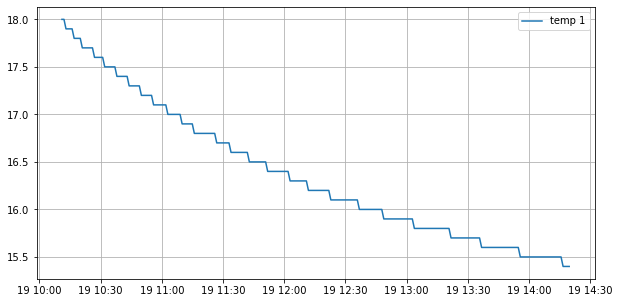

In [32]:
plt.figure(figsize=(10,5))


# noon
plt.plot(x_data_datetime[28000:28250], sensor1.temp[28000:28250], label='temp 1') 

#night
# plt.plot(x_data_datetime[29000:29250], sensor1.temp[29000:29250], label='ac 1') 



# plt.plot(x_data_datetime[28000:28250], sensor2.temp[28000:28250], label='ac 1') 
# plt.plot(x_data_datetime[28000:28250], sensor3.temp[28000:28250], label='ac 1') 



plt.grid(True)
plt.legend() 
plt.show()

In [33]:
# explore = sns.PairGrid(data=sensor1,
#                  height=3, aspect=2.5)

# explore = explore.map(plt.scatter, alpha=0.5)
# explore = explore.set(xlim=(400,0))
# explore = explore.add_legend()

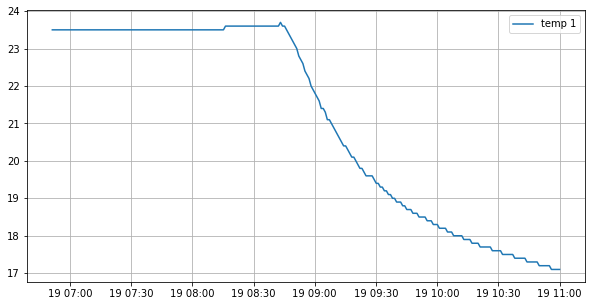

In [206]:
plt.figure(figsize=(10, 5))

plt.plot(x_data_datetime[27800:28050], sensor1.temp[27800:28050], label='temp 1') 


plt.grid(True)
plt.legend() 
plt.show()

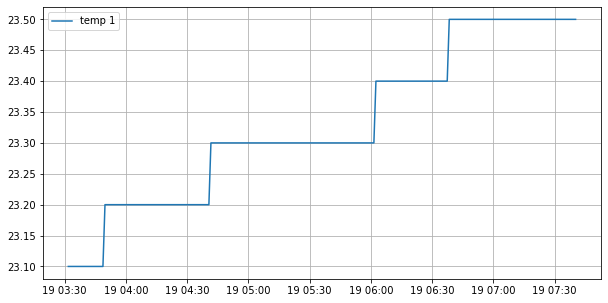

In [205]:
plt.figure(figsize=(10, 5))

plt.plot(x_data_datetime[27600:27850], sensor1.temp[27600:27850], label='temp 1') 


plt.grid(True)
plt.legend() 
plt.show()

In [223]:
device1 = sensor1.copy()
device2 = sensor2.copy()
device1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72090 entries, 0 to 72089
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   batl                 62 non-null     float64
 1   deploymentGroupId    62 non-null     object 
 2   tsmEv                62 non-null     float64
 3   tsmGw                62 non-null     object 
 4   tsmId                62 non-null     float64
 5   tsmTs                62 non-null     float64
 6   tsmTuid              62 non-null     object 
 7   Unnamed: 7           0 non-null      float64
 8   accx                 41000 non-null  float64
 9   accy                 41000 non-null  float64
 10  accz                 41000 non-null  float64
 11  deploymentGroupId.1  41000 non-null  object 
 12  tsmEv.1              41000 non-null  float64
 13  tsmGw.1              41000 non-null  object 
 14  tsmId.1              41000 non-null  float64
 15  tsmTs.1              41000 non-null 

In [224]:
device1 = device1.drop(columns=[
    'deploymentGroupId', 'tsmEv', 'tsmGw', 'tsmId', 'tsmTs', 'tsmTuid', 'Unnamed: 7',
    'deploymentGroupId.1', 'tsmEv.1', 'tsmGw.1', 'tsmId.1', 'tsmTs.1', 'tsmTuid.1', 'Unnamed: 17',
    'deploymentGroupId.2', 'tsmEv.2', 'tsmGw.2', 'tsmId.2', 'tsmTuid.2', 'Unnamed: 28',
    'deploymentGroupId.3', 'tsmEv.3', 'tsmGw.3', 'tsmId.3', 'tsmTuid.3',
    'batl','accx','accy', 'accz','activityLevel', 'histogram1', 'histogram2',
    'histogram3', 'histogram4', 'histogram5', 'histogram6', 'energyLevel'
])
device2 = device2.drop(columns=[
    'deploymentGroupId', 'tsmEv', 'tsmGw', 'tsmId', 'tsmTs', 'tsmTuid', 'Unnamed: 7',
    'deploymentGroupId.1', 'tsmEv.1', 'tsmGw.1', 'tsmId.1', 'tsmTs.1', 'tsmTuid.1', 'Unnamed: 17',
    'deploymentGroupId.2', 'tsmEv.2', 'tsmGw.2', 'tsmId.2', 'tsmTuid.2', 'Unnamed: 28',
    'deploymentGroupId.3', 'tsmEv.3', 'tsmGw.3', 'tsmId.3', 'tsmTuid.3',
    'batl','accx','accy', 'accz','activityLevel', 'histogram1', 'histogram2',
    'histogram3', 'histogram4', 'histogram5', 'histogram6', 'energyLevel'
])

In [39]:
device1

,airp,humd,lght,temp,tsmTs.2,histogram0,tsmTs.3
0,97598.0,52.3,0,7.5,1675116016,0.0,1.677433e+09
1,97597.1,52.3,4,7.5,1675116076,0.0,1.677433e+09
2,97598.3,52.2,4,7.5,1675116135,0.0,1.677433e+09
3,97601.1,52.1,4,7.5,1675116195,0.0,1.677433e+09
4,97603.5,52.2,4,7.5,1675116255,0.0,1.677433e+09
...,...,...,...,...,...,...,...
72085,99323.7,29.1,0,14.5,1679482421,NaN,NaN
72086,99324.9,29.1,4,14.5,1679482481,NaN,NaN
72087,99326.2,29.1,0,14.5,1679482541,NaN,NaN
72088,99325.3,29.1,8,14.5,1679482601,NaN,NaN


In [40]:
actlv1_datetime = [datetime.datetime.fromtimestamp(x) for x in sensor1['tsmTs.3'][: 34000]]
actlv2_datetime = [datetime.datetime.fromtimestamp(x) for x in sensor2['tsmTs.3'][: 34000]]
actlv3_datetime = [datetime.datetime.fromtimestamp(x) for x in sensor3['tsmTs.3'][: 34000]]

In [41]:
sensor1_copy = sensor1.histogram0[:34000]
sensor2_copy = sensor2.histogram0[:34000]

sensor2_copy

0        34.0
1        40.0
2        44.0
3        46.0
4        38.0
         ... 
33995     6.0
33996     6.0
33997     7.0
33998     1.0
33999     3.0
Name: histogram0, Length: 34000, dtype: float64

In [42]:
from scipy.signal import argrelextrema

# for local maxima
localMax_sen1_his0 = argrelextrema(sensor1_copy.to_numpy(), np.greater)

# for local minima
localMin_sen1_his0 = argrelextrema(sensor1_copy.to_numpy(), np.less)

In [43]:
localMax_sen1_his0[0]

array([  321,   327,   329, ..., 33717, 33724, 33790], dtype=int64)

In [47]:
sensor1_copy = sensor1[['tsmTs.3', 'histogram0', 'temp']][:34000]
sensor2_copy = sensor2[['tsmTs.3', 'histogram0', 'temp']][:34000]
# threshold = 200
# above_threshold = np.where(sensor1_copy.histogram0  > threshold)[0]
nonNullHis0 = sensor1_copy.iloc[above_threshold]
nonNullHis0 = nonNullHis0.rename(columns = {'tsmTs.3':'datetime', 'histogram0':'activity_level'} )


sensor1_copy

,tsmTs.3,histogram0,temp
0,1.677433e+09,0.0,7.5
1,1.677433e+09,0.0,7.5
2,1.677433e+09,0.0,7.5
3,1.677433e+09,0.0,7.5
4,1.677433e+09,0.0,7.5
...,...,...,...
33995,1.679484e+09,0.0,13.1
33996,1.679485e+09,0.0,13.1
33997,1.679485e+09,0.0,13.1
33998,1.679485e+09,0.0,13.1


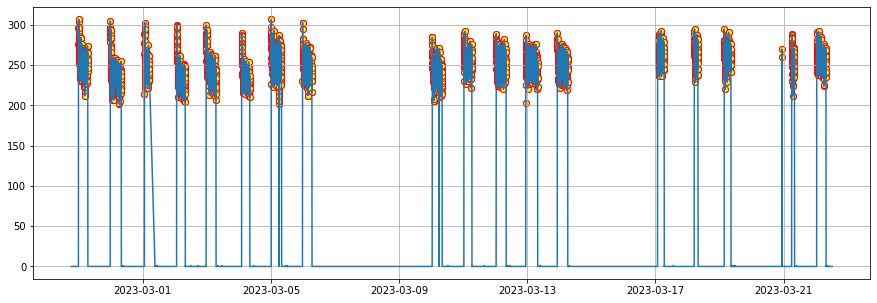

In [48]:
plt.figure(figsize=(15,5))

categorized_datetime = [datetime.datetime.fromtimestamp(x) for x in nonNullHis0['datetime']]

plt.plot(actlv1_datetime, sensor1_copy.histogram0, label='Sensor 1 His0')
plt.scatter(categorized_datetime, nonNullHis0.activity_level, c ="yellow", edgecolor ="red")
plt.scatter(categorized_datetime, nonNullHis0.activity_level, c ="yellow", edgecolor ="red")
        
plt.grid(True)
plt.show()

The following cell takes threshold and return np.array of indices for (start,end) for each wave

In [515]:
threshold = 200

def getIndices(threshold : int=0, width :int=100) -> np:
    above_threshold = np.where(sensor1_copy.histogram0 >= threshold)[0]
    nonNullHis0 = sensor1_copy.iloc[above_threshold]

    start_index = nonNullHis0.index[0]
    end_index = nonNullHis0.index[0]
    indices = []
    for i in range(0, above_threshold.size ):
        if (above_threshold[i] - above_threshold[i-1] > width): # width = <wave-width>
            end_index = nonNullHis0.index[i-1]
            indices.append([start_index, end_index])
            start_index = nonNullHis0.index[i]
    return np.array(indices) 


def getSegments(sensor: pd, threshold : int=0, width :int=100) -> np:
    """
    Return 2-dim np.array of indices where each 1-dim array is (start, end)
    of indices for a wave.
    width: presents the width of each wave.
    Each wave presents one running-time for a device.
    """
    above_threshold = np.where(sensor.histogram0 > threshold)[0]
    nonNullHis0 = sensor.iloc[above_threshold]

    start_index = nonNullHis0.index[0]
    end_index = nonNullHis0.index[0]
    waves = []
    for i in range(above_threshold.size):
#         if (above_threshold[i-1]+1 != above_threshold[i]):
        
        if (above_threshold[i] - above_threshold[i-1] > width):  # width = <wave-width>
            end_index = nonNullHis0.index[i-1]
#             indices.append([start_index, end_index])
            # the following will return only times instead of indices
#             indices.append([sensor1_copy.iloc[start_index]['tsmTs.3'], sensor1_copy.iloc[end_index]['tsmTs.3']])
        
#             indices.append([start_index, end_index])

            waves.append([sensor1_copy.iloc[start_index], sensor1_copy.iloc[end_index]])
            start_index = nonNullHis0.index[i]
    return np.array(waves) 
     
getSegments(sensor1, 200, 200).shape



(18, 2, 3)

In [325]:
print(w)

[[[1.67745188e+09 2.77000000e+02 7.30000000e+00]
  [1.67747692e+09 2.47000000e+02 7.20000000e+00]]

 [[1.67753773e+09 2.98000000e+02 6.50000000e+00]
  [1.67756714e+09 2.37000000e+02 6.20000000e+00]]

 [[1.67762980e+09 2.14000000e+02 5.20000000e+00]
  [1.67782268e+09 2.23000000e+02 4.00000000e+00]]

 [[1.67789187e+09 2.63000000e+02 4.40000000e+00]
  [1.67808135e+09 2.31000000e+02 8.50000000e+00]]

 [[1.67840584e+09 2.83000000e+02 6.50000000e+00]
  [1.67851265e+09 2.59000000e+02 1.68000000e+01]]

 [[1.67857830e+09 2.65000000e+02 2.20000000e+01]
  [1.67877113e+09 2.29000000e+02 2.39000000e+01]]

 [[1.67901350e+09 2.53000000e+02 2.34000000e+01]
  [1.67903129e+09 2.51000000e+02 1.72000000e+01]]

 [[1.67911246e+09 2.89000000e+02 2.34000000e+01]
  [1.67912234e+09 2.53000000e+02 1.99000000e+01]]

 [[1.67919339e+09 2.95000000e+02 2.34000000e+01]
  [1.67921130e+09 2.70000000e+02 1.63000000e+01]]]


In [51]:
# print(above_threshold[0]+1 != above_threshold[0])
# print(above_threshold[0]+1 - above_threshold[5] < 10 )
# print(((above_threshold[10] ,above_threshold[0])   ))
nonNullHis0

,datetime,activity_level,temp
319,1.677452e+09,277.0,7.3
320,1.677452e+09,296.0,7.3
321,1.677452e+09,304.0,7.3
322,1.677452e+09,271.0,7.3
323,1.677452e+09,287.0,7.3
...,...,...,...
33710,1.679467e+09,244.0,13.5
33711,1.679467e+09,245.0,13.5
33712,1.679468e+09,240.0,13.5
33713,1.679468e+09,269.0,13.5


### Visualize result of getSegmentsIndices()

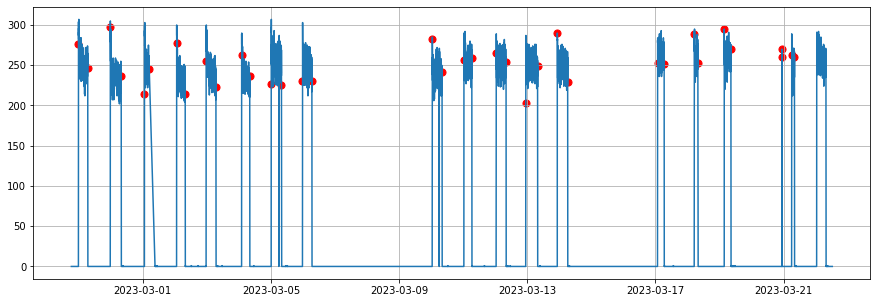

18

In [516]:
plt.figure(figsize=(15,5))

def getConvertedTime(time):
    return datetime.datetime.fromtimestamp(time) 

def getConvertedArray(device, threshold: int=0, width: int=0):
    arr = getSegments(device, threshold, width)
    above_threshold_datetime = []

    for i in range(arr.shape[0]):
        above_threshold_datetime.append([
            [getConvertedTime(arr[i][0][0]), arr[i][0][1]], 
            [getConvertedTime(arr[i][1][0]), arr[i][1][1]]
        ])

    return np.array(above_threshold_datetime)

arr = getConvertedArray(sensor1, 200, 200)

for i in range(arr.shape[0]):
    plt.scatter(arr[i][0][0], arr[i][0][1], edgecolor ="red", s=50, c='r')
    plt.scatter(arr[i][1][0], arr[i][1][1], edgecolor ="red", s=50, c='r')
plt.plot(actlv1_datetime, sensor1_copy.histogram0)
# plt.plot(actlv2_datetime, sensor2_copy.histogram0)


plt.grid(True)
plt.show()
arr.shape[0]

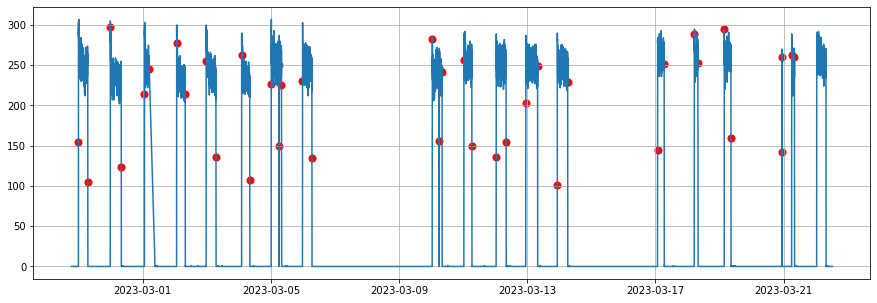

17

In [324]:
plt.figure(figsize=(15,5))

test1 = getConvertedArray(sensor1_copy, 100, 1)

for i in range(test1.shape[0]):
    plt.scatter(test1[i][0][0], test1[i][0][1], edgecolor ="red", s=50, c='r')
    plt.scatter(test1[i][1][0], test1[i][1][1], edgecolor ="red", s=50, c='r')
plt.plot(actlv1_datetime, sensor1_copy.histogram0)
# plt.plot(actlv2_datetime, sensor2_copy.histogram0)


plt.grid(True)
plt.show()
arr.shape[0]

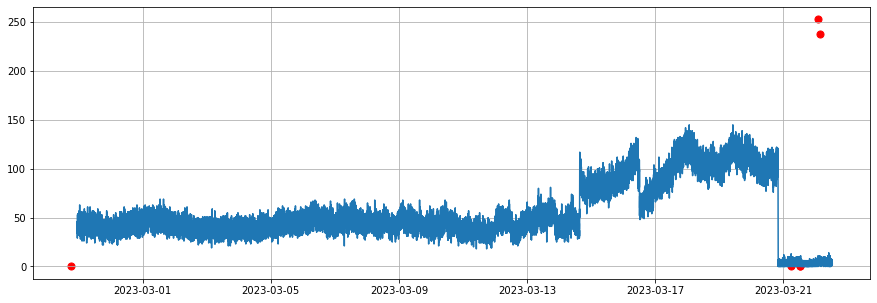

17

In [65]:
plt.figure(figsize=(15,5))

arr2 = getConvertedArray(sensor2_copy, 10, 350)

for i in range(arr2.shape[0]):
    plt.scatter(arr2[i][0][0], arr2[i][0][1], edgecolor ="red", s=50, c='r')
    plt.scatter(arr2[i][1][0], arr2[i][1][1], edgecolor ="red", s=50, c='r')
plt.plot(actlv2_datetime, sensor2_copy.histogram0)
# plt.plot(actlv2_datetime, sensor2_copy.histogram0)


plt.grid(True)
plt.show()
arr.shape[0]

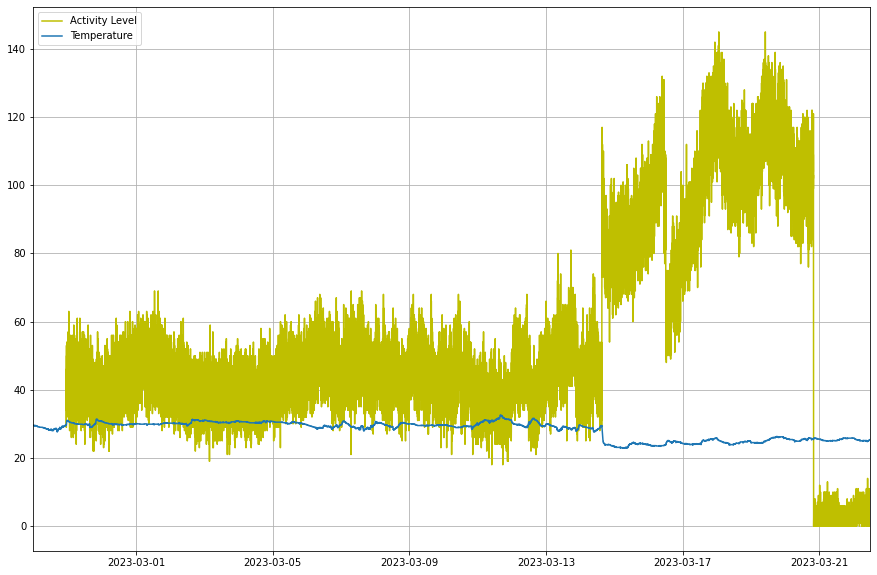

In [227]:
plt.figure(figsize=(15,10))

sensor1_datetime = [datetime.datetime.fromtimestamp(x) for x in device1['tsmTs.2']]
sensor2_datetime_his = [datetime.datetime.fromtimestamp(x) for x in device2['tsmTs.2']]

plt.plot(actlv2_datetime, sensor2_copy.histogram0 , label="Activity Level", c='y')
plt.plot(sensor2_datetime_his, device2.temp, label='Temperature')

plt.xlim(sensor1_datetime[37000], sensor1_datetime[-1])

plt.grid(True)
plt.legend()
plt.show()

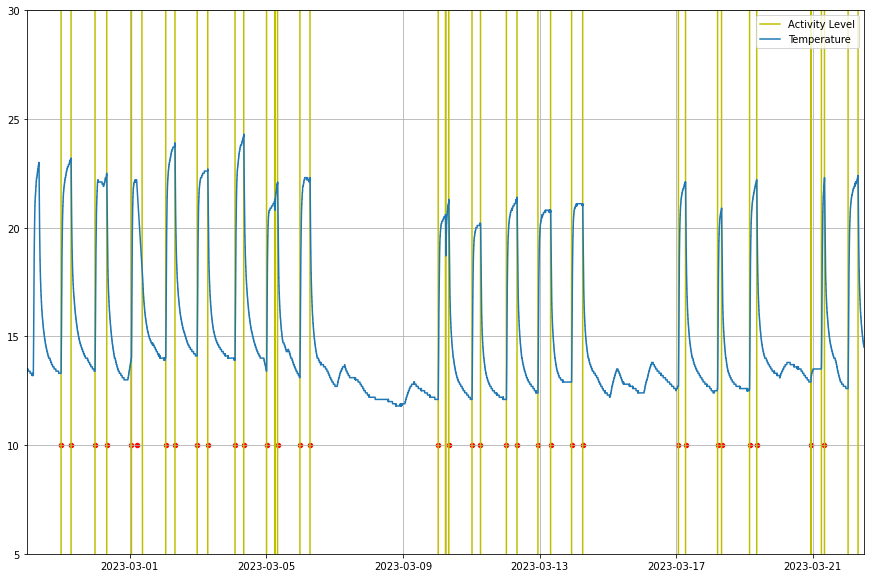

In [387]:
plt.figure(figsize=(15,10))

sensor1_datetime = [datetime.datetime.fromtimestamp(x) for x in device1['tsmTs.2']]

for i in range(arr.shape[0]):
#     plt.scatter(arr[i][0][0], arr[i][0][1]- threshold, edgecolor ="red", s=50, c='r')
    plt.scatter(arr[i][0][0], 10, edgecolor ="red", s=20, c='r')
    plt.scatter(arr[i][1][0], 10, edgecolor ="red", s=20, c='r')
plt.plot(actlv1_datetime, sensor1_copy.histogram0 , label="Activity Level", c='y')
plt.plot(sensor1_datetime, device1.temp, label='Temperature')

# to zoom in 
plt.ylim(5, 30)
plt.xlim(sensor1_datetime[37000], sensor1_datetime[-1])

plt.grid(True)
plt.legend()


plt.show()

In [67]:

def getTempDuringRunning(sensor, segments, indices):
    df_during_running = pd.DataFrame(columns = ['from', 'to', 'time', 'temp', 'category']) 
    temp_indices =[]
    
    for i in range(segments.shape[0]):
        temp_indices.append(np.where((sensor['tsmTs.2'] >= segments[i][0][0])&(sensor['tsmTs.2'] <= segments[i][1][0]))[0])
    
    for indices in range(len(temp_indices)):
        temps = 0
        n_temps = 0
        for index in range(temp_indices[indices].shape[0]):
            n_temps += 1
            temps += sensor.iloc[[temp_indices[indices][index]]].temp

             
            new_row = {
                'from':sensor.iloc[[temp_indices[indices][0]]]['tsmTs.2'].values[0],
                'to': sensor.iloc[[temp_indices[0][len(temp_indices)-1]]]['tsmTs.2'].values[0],
                'time': sensor.iloc[[temp_indices[indices][index]]]['tsmTs.2'].values[0],
                'temp': sensor.iloc[[temp_indices[indices][index]]].temp.values[0],
                'category': indices
            }
            df_during_running.loc[len(df_during_running)] = new_row
            
    return df_during_running

sensor1_during_running = getTempDuringRunning(sensor1, getSegments(sensor1, threshold), getIndices(threshold))
sensor2_during_running = getTempDuringRunning(sensor2, getSegments(sensor2, 10), getIndices(10))
# print(sensor1.iloc[[0]]['tsmTs.2'])


In [68]:
# s2 = getTempDuringRunning(getSegments(sensor2, 10), getIndices(10))
# s2

sensor1_during_running

,from,to,time,temp,category
0,1677451885,1677452904,1677451885,13.3,0
1,1677451885,1677452904,1677451945,13.4,0
2,1677451885,1677452904,1677452005,13.4,0
3,1677451885,1677452904,1677452065,13.4,0
4,1677451885,1677452904,1677452125,13.5,0
...,...,...,...,...,...
6351,1679375134,1677452904,1679382443,22.1,17
6352,1679375134,1677452904,1679382503,22.1,17
6353,1679375134,1677452904,1679382562,22.2,17
6354,1679375134,1677452904,1679382622,22.2,17


In [69]:
sensor2_during_running

,from,to,time,temp,category
0,1677432791,1677433031,1677432791,28.6,0
1,1677432791,1677433031,1677432851,28.5,0
2,1677432791,1677433031,1677432911,28.5,0
3,1677432791,1677433031,1677432971,28.5,0
4,1677432791,1677433031,1677433031,28.5,0
...,...,...,...,...,...
31885,1679446531,1677433031,1679450904,25.3,4
31886,1679446531,1677433031,1679450964,25.3,4
31887,1679446531,1677433031,1679451024,25.3,4
31888,1679446531,1677433031,1679451084,25.2,4


#### Show temp when device is on

[Text(1677250000.0, 0, ''),
 Text(1677500000.0, 0, ''),
 Text(1677750000.0, 0, ''),
 Text(1678000000.0, 0, ''),
 Text(1678250000.0, 0, ''),
 Text(1678500000.0, 0, ''),
 Text(1678750000.0, 0, ''),
 Text(1679000000.0, 0, ''),
 Text(1679250000.0, 0, ''),
 Text(1679500000.0, 0, '')]

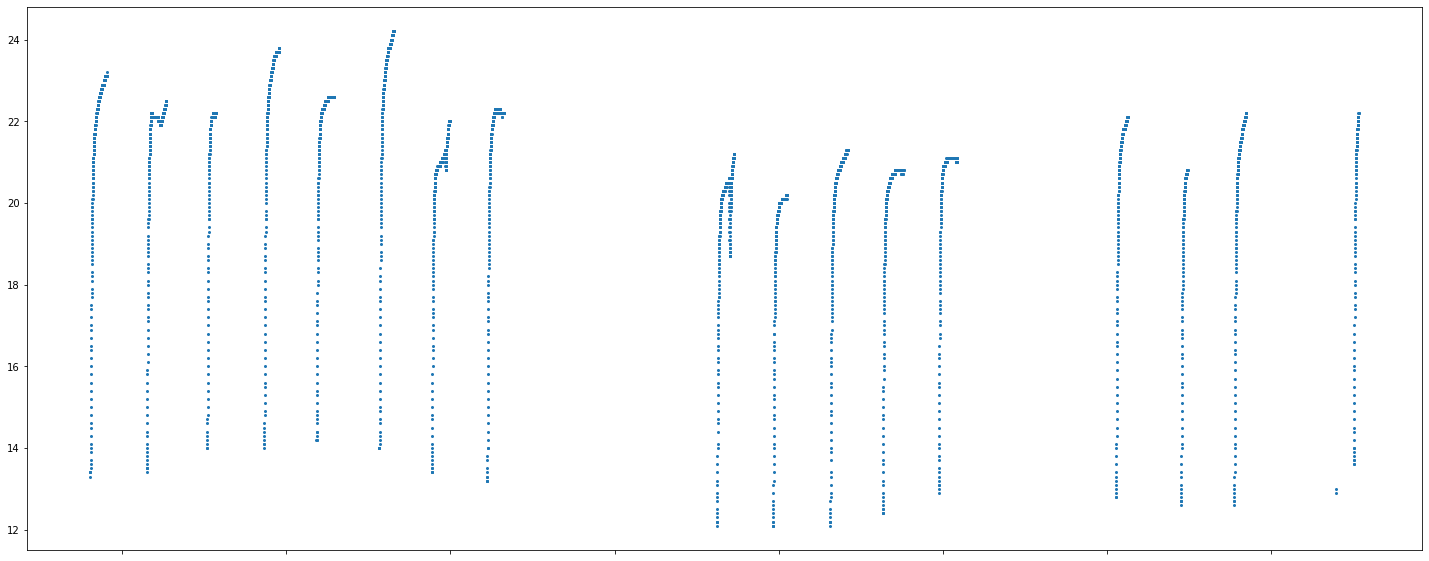

In [70]:
plt.figure(figsize=(25,10))
plt.scatter(sensor1_during_running.time, sensor1_during_running.temp, s=4)
plt.gca().xaxis.set_ticklabels([])


[Text(1677250000.0, 0, ''),
 Text(1677500000.0, 0, ''),
 Text(1677750000.0, 0, ''),
 Text(1678000000.0, 0, ''),
 Text(1678250000.0, 0, ''),
 Text(1678500000.0, 0, ''),
 Text(1678750000.0, 0, ''),
 Text(1679000000.0, 0, ''),
 Text(1679250000.0, 0, ''),
 Text(1679500000.0, 0, ''),
 Text(1679750000.0, 0, '')]

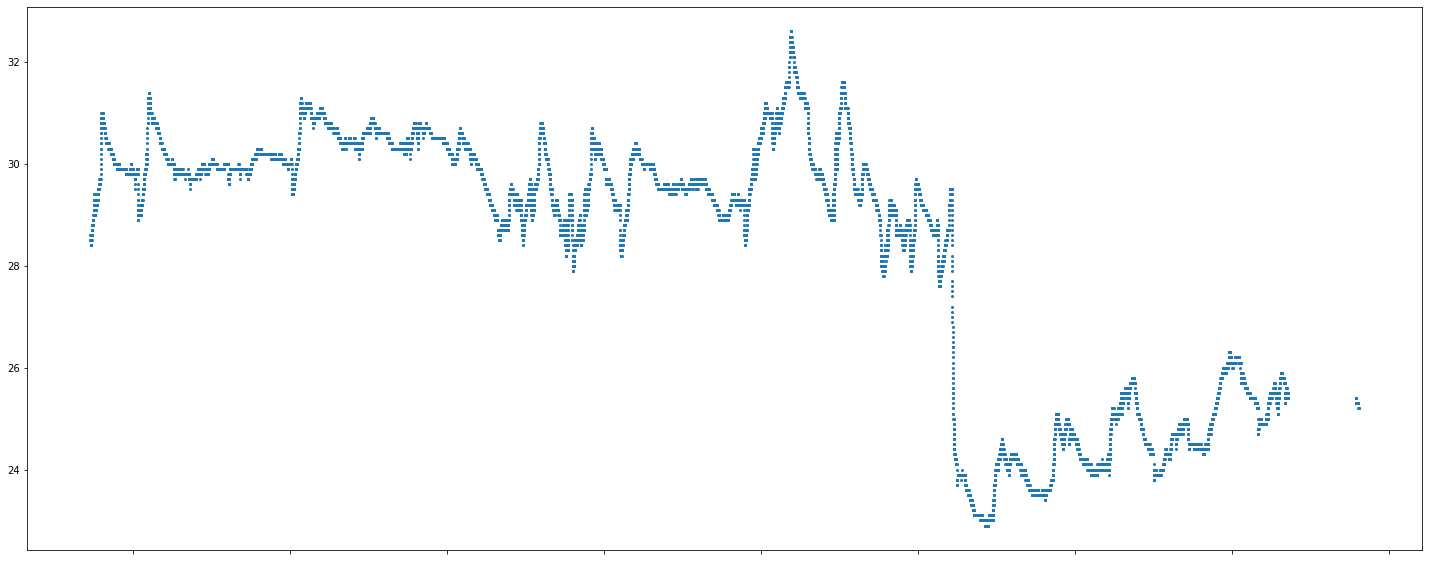

In [71]:
plt.figure(figsize=(25,10))
plt.scatter(sensor2_during_running.time, sensor2_during_running.temp, s=4)
plt.gca().xaxis.set_ticklabels([])


In [152]:
cat_1 = np.where(sensor1_during_running.category == 0)
cat_2 = np.where(sensor1_during_running.category == 1)
cat_3 = np.where(sensor1_during_running.category == 2)
cat_4 = np.where(sensor1_during_running.category == 3)
cat_5 = np.where(sensor1_during_running.category == 4)
cat_6 = np.where(sensor1_during_running.category == 5)
sensor1_during_running.iloc[cat_2]

,from,to,time,temp,category,running_time,temp_at_start,log_running_time
419,1677537727,1677452904,1677537727,13.4,1,0.000000,13.4,-inf
420,1677537727,1677452904,1677537787,13.5,1,0.016667,13.4,-4.094345
421,1677537727,1677452904,1677537846,13.5,1,0.033056,13.4,-3.409566
422,1677537727,1677452904,1677537906,13.5,1,0.049722,13.4,-3.001303
423,1677537727,1677452904,1677537966,13.6,1,0.066389,13.4,-2.712226
...,...,...,...,...,...,...,...,...
906,1677537727,1677452904,1677566898,22.5,1,8.103056,13.4,2.092241
907,1677537727,1677452904,1677566958,22.5,1,8.119722,13.4,2.094296
908,1677537727,1677452904,1677567018,22.5,1,8.136389,13.4,2.096346
909,1677537727,1677452904,1677567078,22.5,1,8.153056,13.4,2.098393


#### combide all scatter into one day-running

There still an issue with the following scatter where each running time starts in different time and for different number of houre.
This can be fixed by relaying on number of running-houre instead of starting-time

The following scatter shows 3 time of running

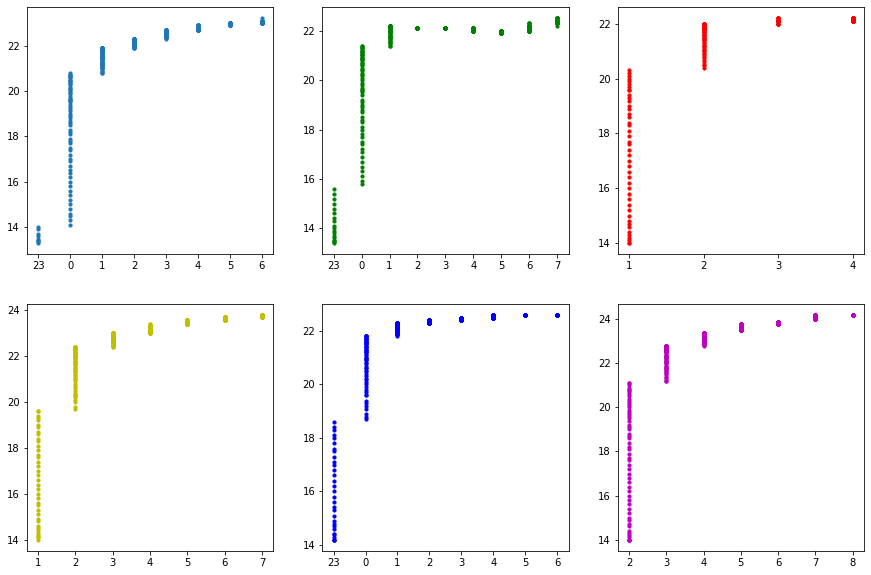

<Figure size 864x576 with 0 Axes>

In [169]:
figure, axis = plt.subplots(2, 3,   figsize=(15, 10))

plt.figure(figsize=(12,8))

size = 10

from_time1 = [str(getConvertedTime(x).time().hour) for x in sensor1_during_running.iloc[cat_1]['time']]
from_time2 = [str(getConvertedTime(x).time().hour) for x in sensor1_during_running.iloc[cat_2]['time']]
from_time3 = [str(getConvertedTime(x).time().hour) for x in sensor1_during_running.iloc[cat_3]['time']]
from_time4 = [str(getConvertedTime(x).time().hour) for x in sensor1_during_running.iloc[cat_4]['time']]
from_time5 = [str(getConvertedTime(x).time().hour) for x in sensor1_during_running.iloc[cat_5]['time']]
from_time6 = [str(getConvertedTime(x).time().hour) for x in sensor1_during_running.iloc[cat_6]['time']]


axis[0, 0].scatter(from_time1, sensor1_during_running.iloc[cat_1]['temp'], s=size)
axis[0, 1].scatter(from_time2, sensor1_during_running.iloc[cat_2]['temp'], s=size, color='g')
axis[0, 2].scatter(from_time3, sensor1_during_running.iloc[cat_3]['temp'], s=size, color='r')
axis[1, 0].scatter(from_time4, sensor1_during_running.iloc[cat_4]['temp'], s=size, color='y')
axis[1, 1].scatter(from_time5, sensor1_during_running.iloc[cat_5]['temp'], s=size, color='b')
axis[1, 2].scatter(from_time6, sensor1_during_running.iloc[cat_6]['temp'], s=size, color='m')


plt.show()

## Sensor 1

The following show all of runnigng for data-frame from the time of starting the device

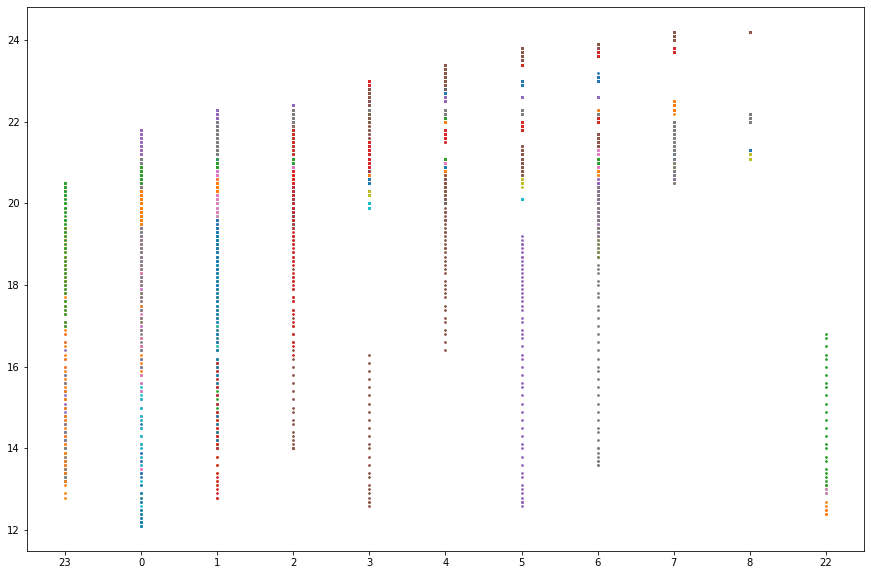

In [76]:
plt.figure(figsize=(15,10))
for i in sensor1_during_running.category.unique():
    plt.scatter(
        [str(getConvertedTime(x).time().hour) for x in sensor1_during_running.iloc[
        np.where(sensor1_during_running.category == i) # iterate over categories 
    ]['time']], sensor1_during_running.iloc[
            np.where(sensor1_during_running.category == i)
        ]['temp']
    ,s=3)


## Sensor 2

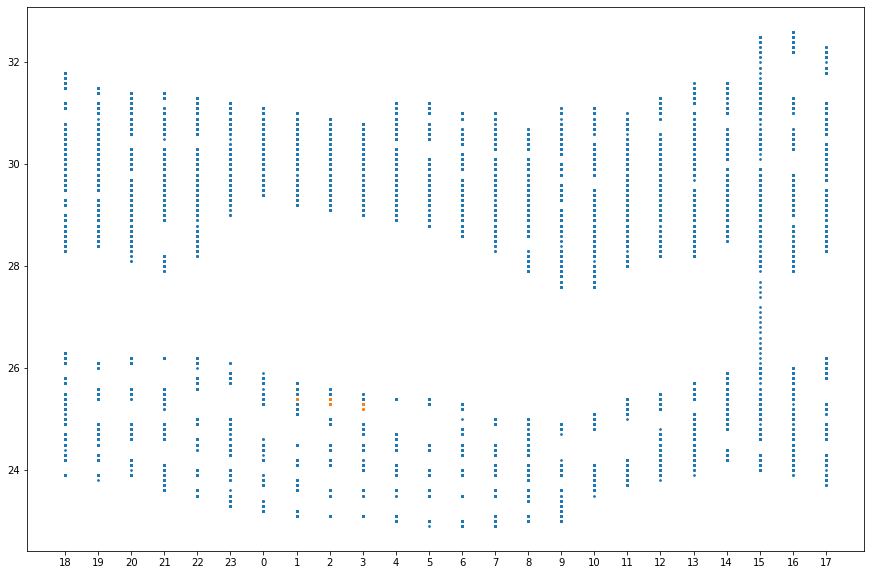

In [77]:
plt.figure(figsize=(15,10))
for i in sensor2_during_running.category.unique():
    plt.scatter(
        [str(getConvertedTime(x).time().hour) for x in sensor2_during_running.iloc[
        np.where(sensor2_during_running.category == i) # iterate over categories 
    ]['time']], sensor2_during_running.iloc[
            np.where(sensor2_during_running.category == i)
        ]['temp']
    ,s=3)
    

In [ ]:
plt.figure(figsize=(15,10))

size = 10

from_time1 = [str(getConvertedTime(x).time().hour) for x in df_during_running.iloc[cat_1]['time']]
from_time2 = [str(getConvertedTime(x).time().hour) for x in df_during_running.iloc[cat_2]['time']]
from_time3 = [str(getConvertedTime(x).time().hour) for x in df_during_running.iloc[cat_3]['time']]
from_time4 = [str(getConvertedTime(x).time().hour) for x in df_during_running.iloc[cat_4]['time']]
from_time5 = [str(getConvertedTime(x).time().hour) for x in df_during_running.iloc[cat_5]['time']]
plt.scatter(from_time1, df_during_running.iloc[cat_1]['temp'], s=size)
# plt.scatter(from_time2, df_during_running.iloc[cat_2]['temp'], s=size)
# plt.scatter(from_time3, df_during_running.iloc[cat_3]['temp'], s=size)
# plt.scatter(from_time4, df_during_running.iloc[cat_4]['temp'], s=size)
# plt.scatter(from_time5, df_during_running.iloc[cat_5]['temp'], s=size)




x1 = df_during_running.iloc[cat_1]['temp']
m, b = np.polyfit( df_during_running.iloc[cat_1]['temp'], t1, 1)

plt.plot(x1, m*x1 + 0, label='Line Function')

In [80]:
def convertSec(sec :int=0) -> float:
     hours=(sec/(60*60))%24
     return hours

con_hour_sen1 = convertSec(int(
    sensor1_during_running.iloc[cat_1]['time'][210] - sensor1_during_running.iloc[cat_1]['from'][210]
))

type (con_hour_sen1)

float

In [81]:
sensor1_during_running['running_time'] = convertSec(sensor1_during_running['time'] - sensor1_during_running['from'])
sensor2_during_running['running_time'] = convertSec(sensor2_during_running['time'] - sensor2_during_running['from'])


In [82]:
print(sensor1_during_running.dtypes)
print(sensor2_during_running.dtypes)

from              int64
to                int64
time              int64
temp            float64
category          int64
running_time    float64
dtype: object
from              int64
to                int64
time              int64
temp            float64
category          int64
running_time    float64
dtype: object


convert type into numaric

In [ ]:
sensor1_during_running = sensor1_during_running.apply(pd.to_numeric)
sensor2_during_running = sensor2_during_running.apply(pd.to_numeric)

print(sensor1_during_running.dtypes)
print(sensor2_during_running.dtypes)

## Sensor 1

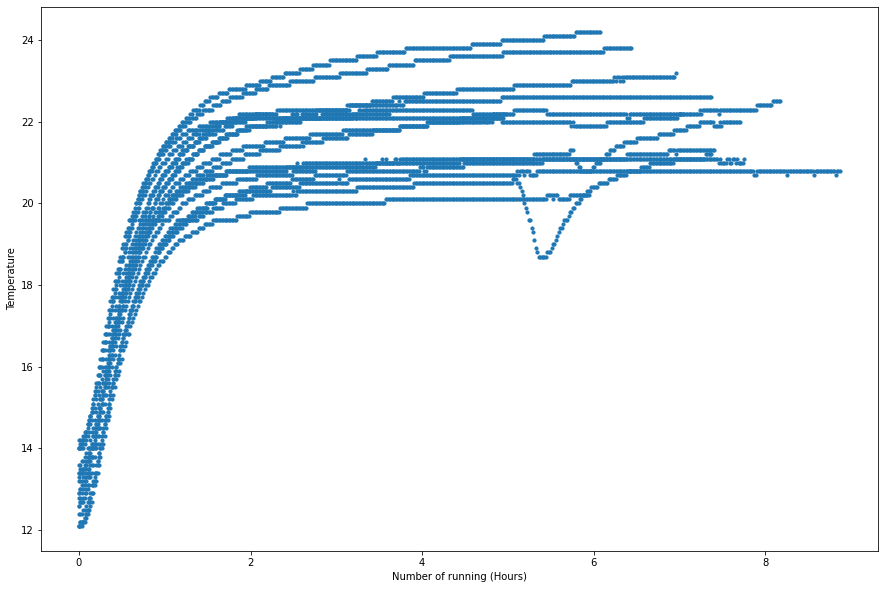

In [452]:
import seaborn as sns

def f(x):
   return -9.6808 * np.exp(-1.7132*x) +21.7397



plt.figure(figsize=(15,10))
plt.scatter(sensor1_during_running['running_time'], sensor1_during_running['temp'], s=size)
# plt.plot(sensor1_during_running['running_time'], f(sensor1_during_running['running_time']), color='red')


# logarithmic_function(sensor1_during_running['running_time'], sensor1_during_running['temp_at_start'], 4.1946, 5.7417,  7.7802)
# plt.plot(sensor1_during_running['running_time'], d), color='red')

# plt.plot(sensor1_during_running['running_time'], f(sensor1_during_running['temp'], *popt), '-', label='fit')
# a = 4.1946
# b = 5.7417
# c = 7.7802

plt.xlabel('Number of running (Hours)')
plt.ylabel('Temperature')
plt.show()

In [432]:
def logarithmic_function(x1, x2, a, b, c):
    y = a * np.log(x1) + b * np.log(x2) + c
    return y

popt, pcov = curve_fit(logarithmic_function, (sensor1_during_running['running_time'], sensor1_during_running['temp_at_start']), sensor1_during_running['temp'])
a, b, c = popt
print("a = {:.4f}".format(a))
print("b = {:.4f}".format(b))
print("c = {:.4f}".format(popt[2]))
# zz = logarithmic_function(sensor1_during_running['running_time'], sensor1_during_running['temp_at_start'], 44957.1246, 0, -44938.1949)
# zz

TypeError: logarithmic_function() takes 5 positional arguments but 6357 were given

In [442]:
from scipy.optimize import  differential_evolution


x1 = sensor1_during_running['running_time']
x2 = sensor1_during_running['temp_at_start']
y = sensor1_during_running['temp']

# Define the logarithmic function
def logarithmic_function(x1, x2, a, b, c):
    y = a * np.log(x1) + b * np.log(x2) + c
    return y

# Use curve_fit to fit the function to the data
try:
    
    bounds = [(0, 10), (0, 10), (-10, 10)]
    result = differential_evolution(lambda p: np.sum((logarithmic_function((x1, x2), *p) - y)**2), bounds)

#     popt, pcov = curve_fit(logarithmic_function, (x1, x2), y, maxfev=130000)
    a, b, c = result.x
    print("a = {:.4f}".format(a))
    print("b = {:.4f}".format(b))
    print("c = {:.4f}".format(c))

except RuntimeError as e:
    print("Error: ", e)

Error:  The map-like callable must be of the form f(func, iterable), returning a sequence of numbers the same length as 'iterable'


In [450]:
# logarithmic_function(sensor1_during_running['running_time'], sensor1_during_running['temp_at_start'], 4.1946, 5.7417,  7.7802)

to_remove = np.where(sensor1_during_running['running_time'] == 0)
save_copy_sensor1 = sensor1_during_running.copy()
save_copy_sensor1 = save_copy_sensor1.drop(index=to_remove[0])


logarithmic_function(save_copy_sensor1['running_time'], save_copy_sensor1['temp_at_start'], 4.1946, 5.7417,  7.7802)


1        5.464227
2        8.371702
3       10.072466
4       11.279177
5       12.215175
          ...    
6351    25.736939
6352    25.771232
6353    25.804682
6354    25.838428
6355    25.871905
Length: 6338, dtype: float64

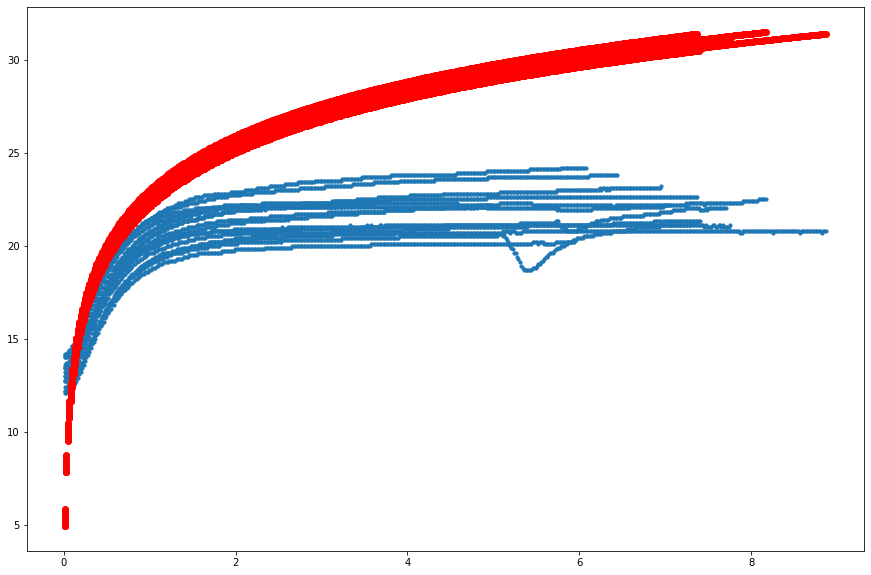

In [458]:
plt.figure(figsize=(15,10))
plt.scatter(save_copy_sensor1['running_time'], save_copy_sensor1['temp'], s=size)
# plt.plot(save_copy_sensor1['running_time'], f(save_copy_sensor1['running_time']), color='red')

# d1 = logarithmic_function(save_copy_sensor1['running_time'], save_copy_sensor1['temp_at_start'], 4.1946, 5.7417,  7.7802)
plt.scatter(save_copy_sensor1['running_time'],  
            logarithmic_function(
                save_copy_sensor1['running_time'], 
                save_copy_sensor1['temp_at_start'], 
                4.1946, 
                5.7417,  
                7.7802
            ), 
            color='red')




In [421]:
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Load the data
init_vals = [50, 0, 90, 63]
 
# Fit the data to the exponential function
popt, pcov = curve_fit(exp_func, sensor1_during_running['running_time'], sensor1_during_running['temp'], maxfev=1800 )

# Print the best-fit parameters
print("a = {:.4f}".format(popt[0]))
print("b = {:.4f}".format(popt[1]))
print("c = {:.4f}".format(popt[2]))



# def exp_func(x, a, b, c, d):
#     return a * np.exp(-b * (x - c)) + d

# Load the data 
# Fit the data to the exponential function
# popt, pcov = curve_fit(exp_func, sensor1_during_running['running_time'], sensor1_during_running['temp'],p0=init_vals, bounds=([0, 0, 90, 0], [1000, 0.1, 200, 200]))

# # Print the best-fit parameters
# print("a = {:.4f}".format(popt[0]))
# print("b = {:.4f}".format(popt[1]))
# print("c = {:.4f}".format(popt[2]))
# print(" = {:.4f}".format(popt[2]))

a = 44957.1246
b = 0.0000
c = -44938.1949


In [406]:
xlog_data = np.log(sensor1_during_running['running_time'])
curve = np.polyfit(xlog_data, sensor1_during_running['temp'], 1)
curve

C:\Users\aiham\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\aiham\anaconda3\lib\site-packages\numpy\lib\polynomial.py:659: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

## Sensor 2

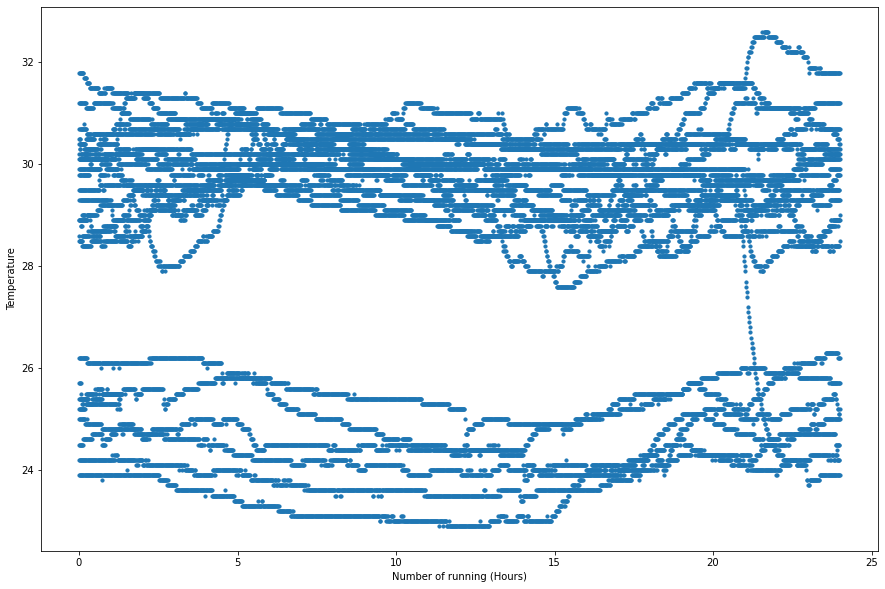

In [84]:
plt.figure(figsize=(15,10))
plt.scatter(sensor2_during_running['running_time'], sensor2_during_running['temp'], s=size)


plt.xlabel('Number of running (Hours)')
plt.ylabel('Temperature')
plt.show()

Create a new column to indicate the temp when the device starts running

In [86]:
from numpy import log


# the first temp was recorded of each category

def getFirstTemp(df):
    first_temp_per_category = {}
    
    for i in df.category.unique():
        first_temp_per_category[i] = df.temp[np.where(df.category == i)[0][0]]
        
    return first_temp_per_category

sensor1_during_running['temp_at_start'] =  sensor1_during_running.apply(lambda x: getFirstTemp(sensor1_during_running).get(x['category']), axis=1 )
sensor1_during_running['log_running_time'] =  log(sensor1_during_running['running_time'])

sensor2_during_running['temp_at_start'] =  sensor2_during_running.apply(lambda x: getFirstTemp(sensor2_during_running).get(x['category']), axis=1 )
sensor2_during_running['log_running_time'] =  log(sensor2_during_running['running_time'])


sensor1_during_running.isnull().sum()
sensor2_during_running.isnull().sum()



C:\Users\aiham\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\aiham\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


from                0
to                  0
time                0
temp                0
category            0
running_time        0
temp_at_start       0
log_running_time    0
dtype: int64

In [ ]:
# sensor1.histogram0[:34000].describe()

# from_time[0].time()

# m, b = np.polyfit( df_during_running.iloc[cat_1]['temp'], from_time1, 1)

t1 = df_during_running['running_time']

m, b = np.polyfit( df_during_running['temp'], t1, 1)
print('y = {:.2f}x + {:.2f}'.format(m, b))

In [ ]:
threshold = 200
above_threshold = np.where(sensor1_copy.histogram0  >= threshold)[0]
nonNullHis0 = sensor1_copy.iloc[above_threshold]
nonNullHis0 = nonNullHis0.rename(columns = {'tsmTs.3':'datetime', 'histogram0':'activity_level'} )



# select_indices = np.where(sensor1_copy.histogram0  > threshold)[0]
# below_threshold = np.where(sensor1_copy.histogram0  == threshold )[0]
# diffs = np.diff(above_threshold)
# end_indices = np.where(diffs > 1)[0]
# start_indices = np.concatenate(([0], end_indices + 1))
# end_indices = np.append(end_indices, len(sensor1_copy) -1 )


In [ ]:
df_during_running['running_time'].values

In [ ]:
test = df_during_running.copy()
test

In [ ]:
test['running_time'] = convertSec(test['time'] - test['from'])

In [ ]:
# plt.scatter(test['running_time'], test['temp'], s=size)


d = df_during_running.copy()
d.info()

In [ ]:
d['time'] = pd.to_numeric(d["time"])
d['from'] = pd.to_numeric(d["from"])
d['to'] = pd.to_numeric(d["to"])
d['category'] = pd.to_numeric(d["category"])
d['running_time'] = pd.to_numeric(d["running_time"])
d.info()

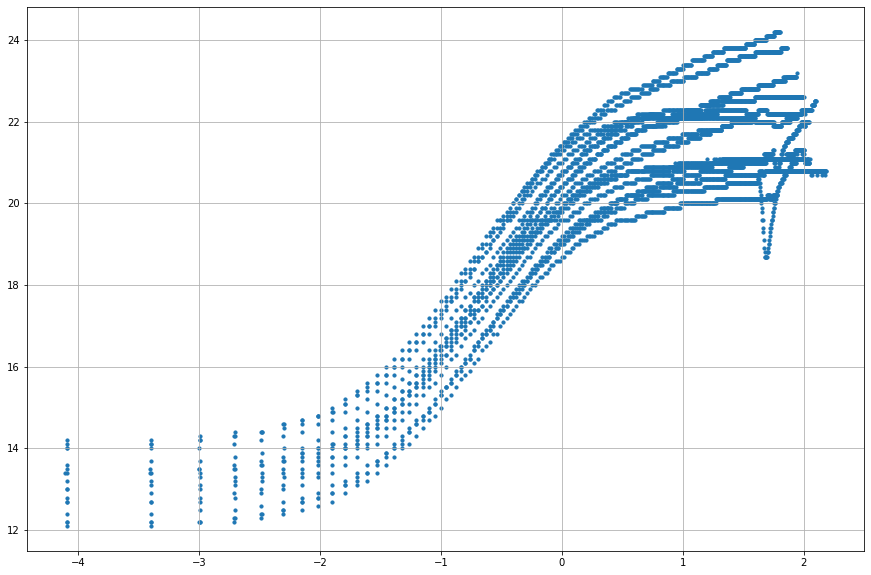

In [88]:
plt.figure(figsize=(15,10))
plt.scatter(log(sensor1_during_running['running_time']), sensor1_during_running['temp'], s=size)
plt.grid(True)
# sns.lmplot(x='running_time', y='temp', data=d)

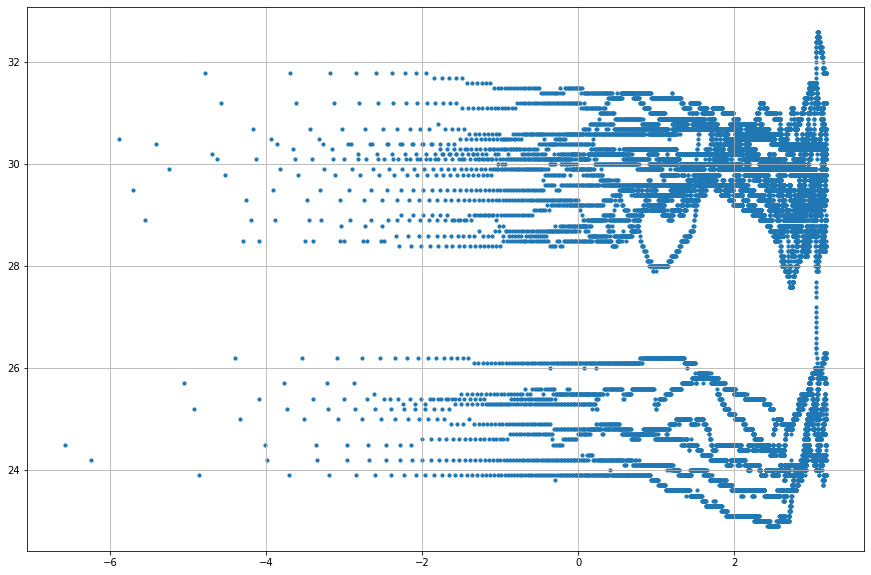

In [89]:
plt.figure(figsize=(15,10))
plt.scatter(log(sensor2_during_running['running_time']), sensor2_during_running['temp'], s=size)
plt.grid(True)
# sns.lmplot(x='running_time', y='temp', data=d)

In [92]:
from numpy import log

c = sensor1_during_running.copy()

# c['log_running_time'] = log(c['running_time'])
# c['log_running_time'][0]

# sns.heatmap(c, 
#             xticklabels=c.columns.values,
#             yticklabels=c.columns.values)

# c = c.drop((c['running_time'] == 0).index)

c = c.drop(c[c['running_time'] == 0].index)
c


,from,to,time,temp,category,running_time,temp_at_start,log_running_time
1,1677451885,1677452904,1677451945,13.4,0,0.016667,13.3,-4.094345
2,1677451885,1677452904,1677452005,13.4,0,0.033333,13.3,-3.401197
3,1677451885,1677452904,1677452065,13.4,0,0.050000,13.3,-2.995732
4,1677451885,1677452904,1677452125,13.5,0,0.066667,13.3,-2.708050
5,1677451885,1677452904,1677452185,13.6,0,0.083333,13.3,-2.484907
...,...,...,...,...,...,...,...,...
6351,1679375134,1677452904,1679382443,22.1,17,2.030278,13.6,0.708173
6352,1679375134,1677452904,1679382503,22.1,17,2.046944,13.6,0.716348
6353,1679375134,1677452904,1679382562,22.2,17,2.063333,13.6,0.724323
6354,1679375134,1677452904,1679382622,22.2,17,2.080000,13.6,0.732368


In [93]:
X = c.drop(columns=['temp','from','to', 'category', 'time'])
y = c['temp']
X

,running_time,temp_at_start,log_running_time
1,0.016667,13.3,-4.094345
2,0.033333,13.3,-3.401197
3,0.050000,13.3,-2.995732
4,0.066667,13.3,-2.708050
5,0.083333,13.3,-2.484907
...,...,...,...
6351,2.030278,13.6,0.708173
6352,2.046944,13.6,0.716348
6353,2.063333,13.6,0.724323
6354,2.080000,13.6,0.732368


In [94]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
glm = PoissonRegressor()
gbdt = HistGradientBoostingRegressor(loss="poisson", learning_rate=0.01)
glm.fit(X_train, y_train)
gbdt.fit(X_train, y_train)
print(glm.score(X_test, y_test))
print(gbdt.score(X_test, y_test))


0.8940920879770924
0.8418539642692158


In [ ]:
f = -1

gbdt.predict([[f, 12, log(f)]])

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso


reg = Lasso()
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))

In [95]:
from numpy import log
from scipy.optimize import curve_fit


t = np.linspace(0.001, 5, 100)
y = []

# Define the nonlinear function using a polynomial of degree 2
def logarithmic(x, a, b):
    return a*log(x)+b

# Use curve_fit to estimate the coefficients of the polynomial
popt, pcov = curve_fit(func, df_during_running['running_time'], df_during_running['temp'])

a_fit = curve_fit(func, df_during_running['running_time'], df_during_running['temp'])[0][1]
b_fit = curve_fit(func, df_during_running['running_time'], df_during_running['temp'])[0][0]

fit = []
for i in t:
    fit.append(logarithmic(i, a_fit, b_fit))
    
    
# Print the estimated coefficients
print('a =', popt[0])
print('b =', popt[1])
print('pcov =', popt)

plt.scatter(df_during_running['running_time'], df_during_running['temp'], s=size)
plt.plot(t, fit, c='r')


NameError: name 'func' is not defined

In [97]:
sensor1_during_running.corr()

,from,to,time,temp,category,running_time,temp_at_start,log_running_time
from,1.000000,NaN,0.999901,-0.320708,0.991556,-0.111440,-0.645413,-0.102378
to,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,0.999901,NaN,1.000000,-0.313363,0.991603,-0.097477,-0.647073,-0.090283
temp,-0.320708,NaN,-0.313363,1.000000,-0.306135,0.553467,0.374895,0.808442
category,0.991556,NaN,0.991603,-0.306135,1.000000,-0.100254,-0.599621,-0.094155
running_time,-0.111440,NaN,-0.097477,0.553467,-0.100254,1.000000,-0.050086,0.868145
temp_at_start,-0.645413,NaN,-0.647073,0.374895,-0.599621,-0.050086,1.000000,-0.035002
log_running_time,-0.102378,NaN,-0.090283,0.808442,-0.094155,0.868145,-0.035002,1.000000


In [98]:
sensor2_during_running.corr()

,from,to,time,temp,category,running_time,temp_at_start,log_running_time
from,1.000000,NaN,0.095157,-0.060186,1.000000,-0.080454,-1.000000,-0.138978
to,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,0.095157,NaN,1.000000,-0.770454,0.095157,0.029996,-0.095157,0.012225
temp,-0.060186,NaN,-0.770454,1.000000,-0.060186,-0.028610,0.060186,-0.019529
category,1.000000,NaN,0.095157,-0.060186,1.000000,-0.080454,-1.000000,-0.138978
running_time,-0.080454,NaN,0.029996,-0.028610,-0.080454,1.000000,0.080454,0.865240
temp_at_start,-1.000000,NaN,-0.095157,0.060186,-1.000000,0.080454,1.000000,0.138978
log_running_time,-0.138978,NaN,0.012225,-0.019529,-0.138978,0.865240,0.138978,1.000000


C:\Users\aiham\AppData\Local\Temp\ipykernel_22976\564329745.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


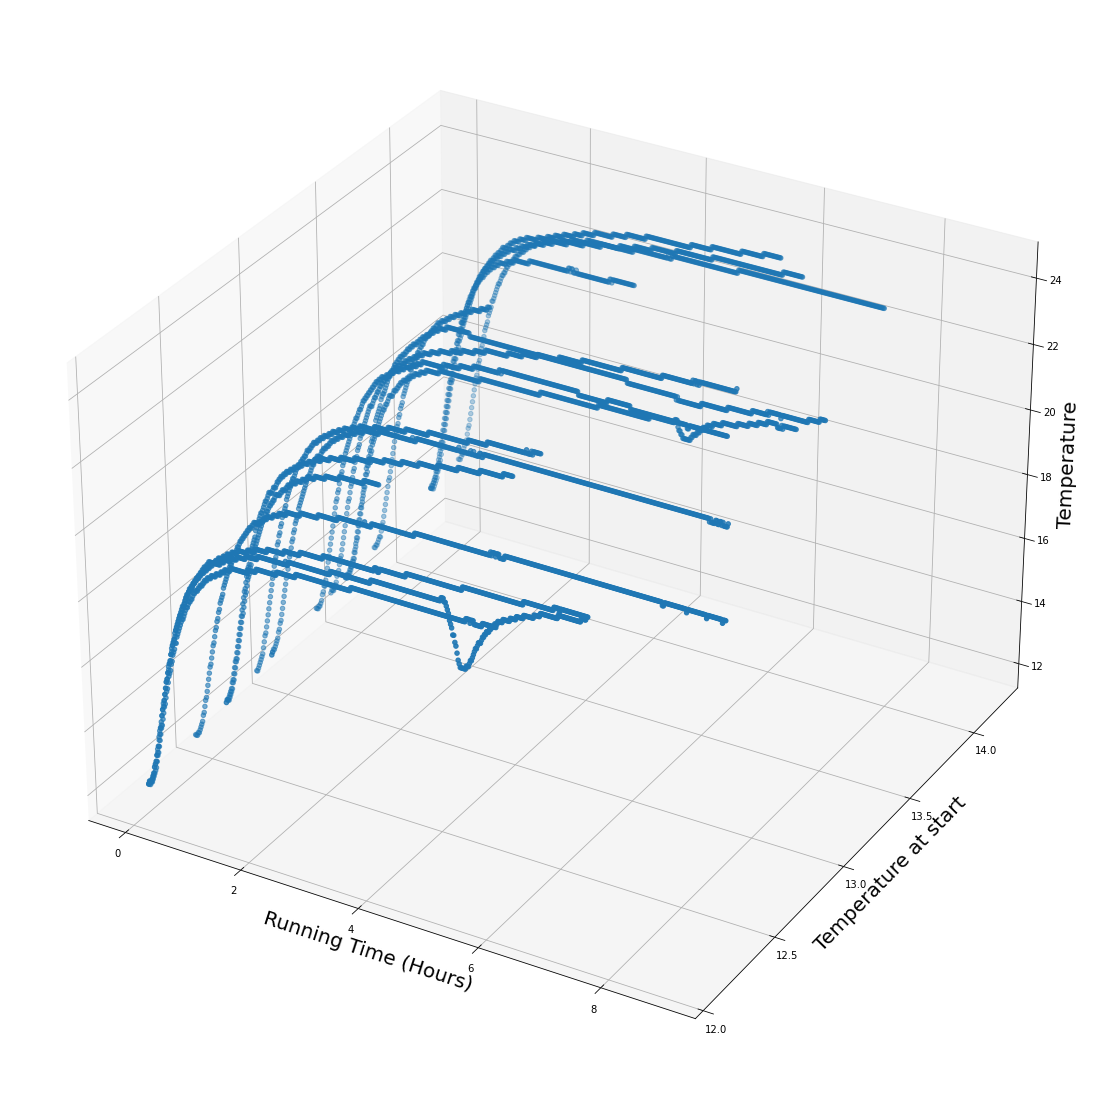

In [326]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig)

# ax = plt.axes(projection ='3d' )
# defining axes
z = sensor1_during_running['temp']
x = sensor1_during_running['running_time']
y = sensor1_during_running['temp_at_start']
ax.scatter(x, y, z)

ax.set_xlabel('Running Time (Hours)', fontsize=20)
ax.set_ylabel('Temperature at start', fontsize=20)
ax.set_zlabel('Temperature', fontsize=20, rotation = 0)

plt.show()